In [73]:
#Decision Tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.metrics import*
from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder

In [74]:
train = pd.read_csv('mushrooms.csv')

In [75]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [76]:
labelencoder=LabelEncoder()
for column in train.columns:
    train[column] = labelencoder.fit_transform(train[column])

In [77]:
train.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [79]:
from sklearn.model_selection import train_test_split

features = train.drop(['class','bruises','odor','gill-attachment','gill-spacing'], axis=1).values #axis=1 refering to the features. horizontal.
target_label = train['class'].values

In [80]:
x_train, x_valid, y_train, y_valid = train_test_split(features, target_label, test_size = 0.2, random_state = 20)
y_train.shape, y_valid.shape, x_train.shape, x_valid.shape

((6499,), (1625,), (6499, 18), (1625, 18))

In [96]:
#len(train["class"])

In [82]:
from sklearn.tree import DecisionTreeClassifier #to make the Decision Tree model

In [144]:
model = DecisionTreeClassifier(random_state = 20,max_depth=7)
#max_depth에 따라 accuracy가 달라진다.
model.fit(x_train, y_train)
prediction = model.predict(x_valid)

In [145]:
prediction

array([0, 1, 0, ..., 1, 1, 0])

In [146]:
from sklearn.tree import plot_tree

[Text(903.96, 1019.25, 'bruises <= 3.5\ngini = 0.499\nsamples = 6499\nvalue = [3356, 3143]'),
 Text(446.4, 883.35, 'veil-type <= 3.5\ngini = 0.271\nsamples = 2651\nvalue = [429, 2222]'),
 Text(178.56, 747.45, 'stalk-color-below-ring <= 1.5\ngini = 0.233\nsamples = 461\nvalue = [399, 62]'),
 Text(89.28, 611.55, 'gini = 0.0\nsamples = 44\nvalue = [0, 44]'),
 Text(267.84000000000003, 611.55, 'cap-color <= 0.5\ngini = 0.083\nsamples = 417\nvalue = [399, 18]'),
 Text(178.56, 475.65, 'gini = 0.0\nsamples = 399\nvalue = [399, 0]'),
 Text(357.12, 475.65, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(714.24, 747.45, 'gill-attachment <= 2.0\ngini = 0.027\nsamples = 2190\nvalue = [30, 2160]'),
 Text(624.96, 611.55, 'gill-size <= 0.5\ngini = 0.008\nsamples = 2169\nvalue = [9, 2160]'),
 Text(535.6800000000001, 475.65, 'gill-attachment <= 0.5\ngini = 0.436\nsamples = 28\nvalue = [9, 19]'),
 Text(446.4, 339.75, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(624.96, 339.75, 'gini = 0.0\nsampl

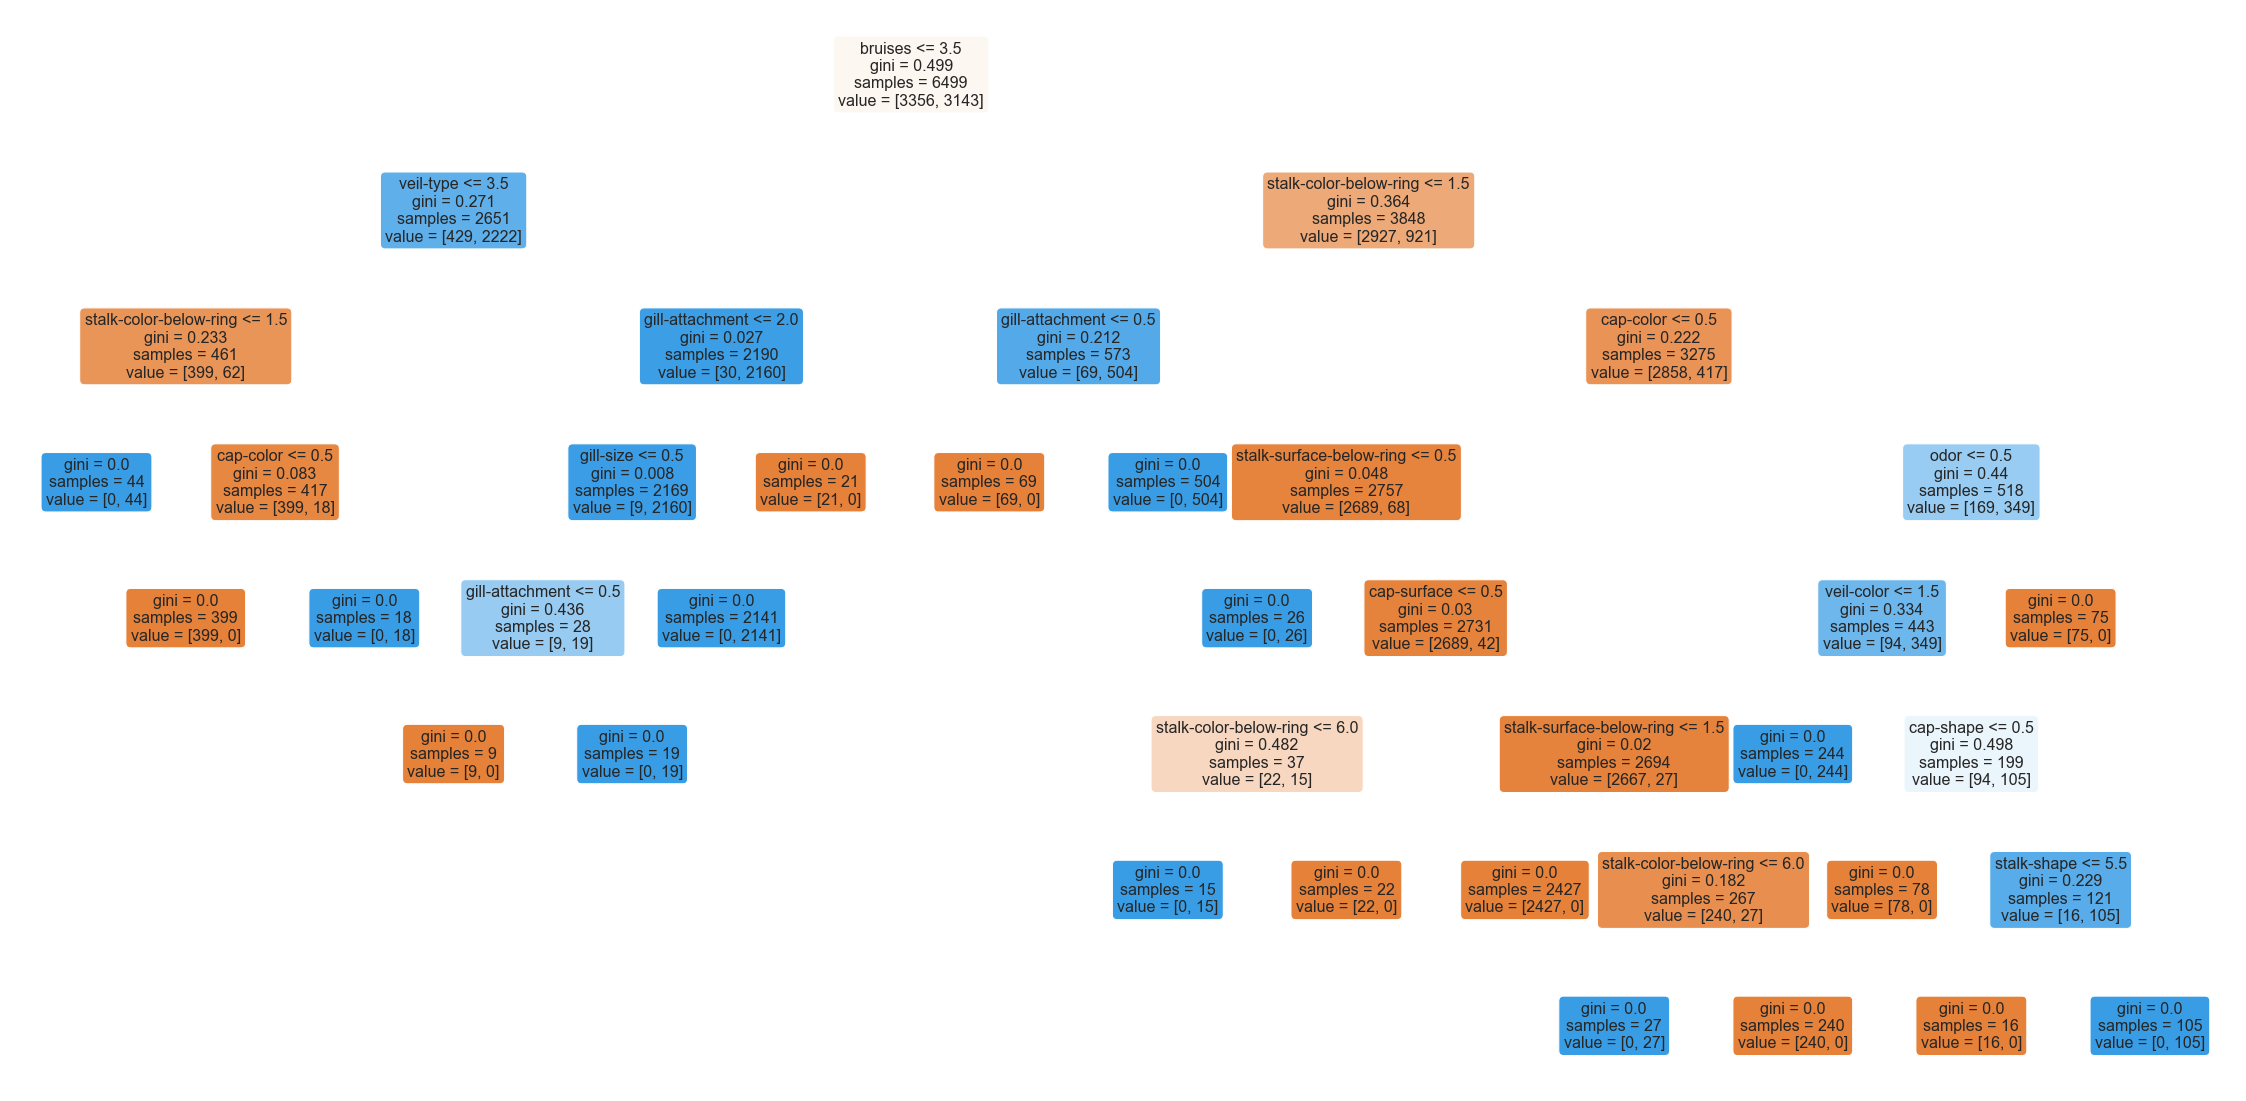

In [147]:
plt.figure(figsize=(40,20))
plt.title("Decision Tree")
plot_tree(model, feature_names=train.columns,  filled=True, rounded = True,fontsize= 16)

In [148]:
print('Tested number: {} \nAccuracy: {:.2f}% '.format(y_valid.shape[0], 100 * accuracy_score(y_valid,prediction)))

Tested number: 1625 
Accuracy: 100.00% 


In [149]:
confusion_matrix(y_valid,prediction)

array([[852,   0],
       [  0, 773]], dtype=int64)

In [150]:
print('Precision: {:.2f}% \nRecall: {:.2f}% \nF1-score: {:.2f}% '.format(100*precision_score(y_valid,prediction),
                                                                         100*recall_score(y_valid,prediction),100*f1_score(y_valid,prediction)))

Precision: 100.00% 
Recall: 100.00% 
F1-score: 100.00% 


In [151]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [152]:
rms = sqrt(mean_squared_error(y_valid, prediction))

In [142]:
rms

0.2997434800728013